In [1]:
pip install yolov8

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install opencv-python-headless


In [3]:
# Install Essential Libraries
!pip install ultralytics

In [4]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

In [7]:
# Load a pretrained YOLOv8n model from Ultralytics
model = YOLO('yolov8n.pt')

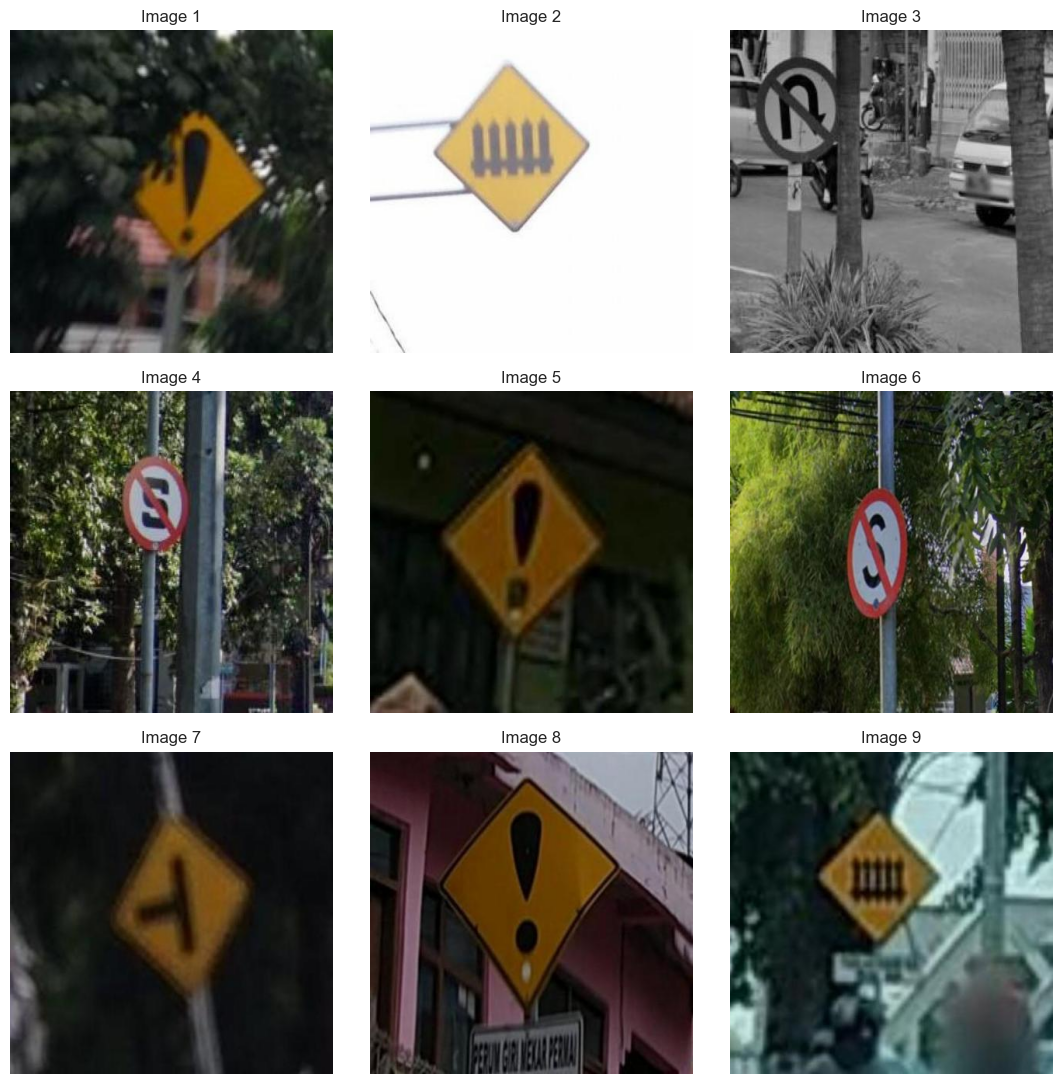

In [8]:
Image_dir = 'D:\\jesi\\roadsign\\train\\images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [9]:
# Get the size of the image
image = cv2.imread("D:\\jesi\\roadsign\\train\\images\\1200px-Korean_Traffic_sign_-U-Turn-svg_png.rf.274d1aed8d8a1a0742635c811acbbad2.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.



image 1/1 D:\jesi\roadsign\train\images\1200px-Korean_Traffic_sign_-U-Turn-svg_png.rf.274d1aed8d8a1a0742635c811acbbad2.jpg: 640x640 (no detections), 571.7ms
Speed: 15.0ms preprocess, 571.7ms inference, 2425.3ms postprocess per image at shape (1, 3, 640, 640)


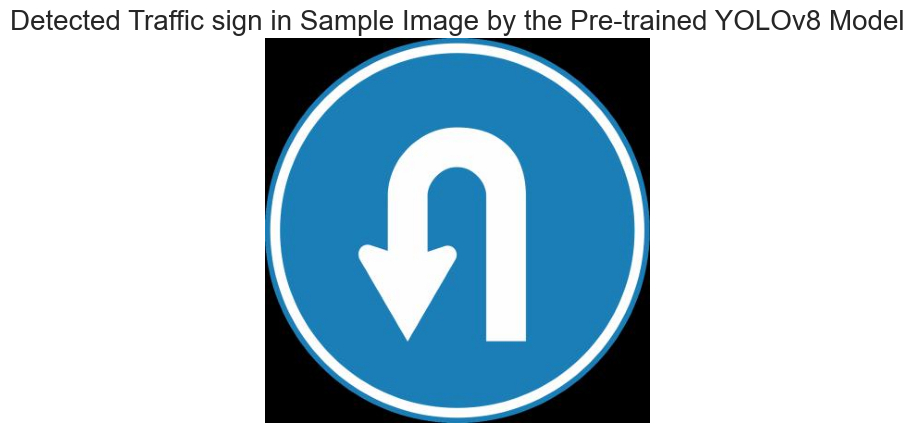

In [10]:
# Path to the image file
image_path = 'D:\\jesi\\roadsign\\train\\images\\1200px-Korean_Traffic_sign_-U-Turn-svg_png.rf.274d1aed8d8a1a0742635c811acbbad2.jpg'

# Perform inference on the provided image(s)
results = model.predict(source=image_path,
                        imgsz=640,  # Resize image to 640x640 (the size pf images the model was trained on)
                        conf=0.5)   # Confidence threshold: 50% (only detections above 50% confidence will be considered)

# Annotate and convert image to numpy array
sample_image = results[0].plot(line_width=2)

# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Display annotated image
plt.figure(figsize=(5,5))
plt.imshow(sample_image)
plt.title('Detected Traffic sign in Sample Image by the Pre-trained YOLOv8 Model', fontsize=20)
plt.axis('off')
plt.show()


In [11]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="D:\\jesi\\roadsign\\data.yaml",epochs=10, imgsz = 416, batch = 64 ,lr0=0.0001, dropout= 0.15, device = 'cpu')

Transferred 355/355 items from pretrained weights
New https://pypi.org/project/ultralytics/8.2.28 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.24  Python-3.11.9 torch-2.3.0+cpu CPU (AMD Ryzen 3 3200U with Radeon Vega Mobile Gfx)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=D:\jesi\roadsign\data.yaml, epochs=10, time=None, patience=100, batch=64, imgsz=416, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train18, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms

train: Scanning D:\jesi\roadsign\train\labels.cache... 1687 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1687/1687 [00:00<?, ?it/s]
val: Scanning D:\jesi\roadsign\valid\labels.cache... 526 images, 0 backgrounds, 0 corrupt: 100%|██████████| 526/526 [00:00<?, ?it/s]

Plotting labels to runs\detect\train18\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000476, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs\detect\train18
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.464       4.09      1.613         24        416: 100%|██████████| 27/27 [38:08<00:00, 84.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [03:44<00:00, 44.85s/it]

                   all        526        540     0.0373      0.645     0.0906     0.0606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.253      2.951      1.429         24        416: 100%|██████████| 27/27 [40:45<00:00, 90.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [04:07<00:00, 49.51s/it]

                   all        526        540      0.565      0.315      0.285      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.258      2.141      1.414         23        416: 100%|██████████| 27/27 [40:24<00:00, 89.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [03:39<00:00, 43.94s/it]

                   all        526        540      0.826      0.219      0.488      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.233      1.709      1.359         23        416: 100%|██████████| 27/27 [42:32<00:00, 94.55s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [03:56<00:00, 47.38s/it]

                   all        526        540      0.694      0.538      0.629      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.202      1.457      1.322         24        416: 100%|██████████| 27/27 [42:31<00:00, 94.49s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [03:46<00:00, 45.34s/it]

                   all        526        540      0.752      0.619       0.77      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.162      1.273      1.295         24        416: 100%|██████████| 27/27 [39:56<00:00, 88.77s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [03:56<00:00, 47.22s/it]

                   all        526        540      0.791        0.7      0.807      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.139      1.181      1.275         23        416: 100%|██████████| 27/27 [42:29<00:00, 94.44s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [03:50<00:00, 46.08s/it]

                   all        526        540      0.811      0.714      0.825      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.095      1.065       1.24         24        416: 100%|██████████| 27/27 [45:06<00:00, 100.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [03:45<00:00, 45.00s/it]

                   all        526        540       0.83      0.762      0.865      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.058      1.005      1.211         23        416: 100%|██████████| 27/27 [43:39<00:00, 97.03s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [03:43<00:00, 44.66s/it]

                   all        526        540      0.871      0.758      0.867      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G       1.01     0.9387      1.184         25        416: 100%|██████████| 27/27 [47:45<00:00, 106.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [03:52<00:00, 46.54s/it]

                   all        526        540      0.855      0.765      0.872      0.573



10 epochs completed in 7.708 hours.
Optimizer stripped from runs\detect\train18\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train18\weights\best.pt, 6.2MB

Validating runs\detect\train18\weights\best.pt...
Ultralytics YOLOv8.2.24  Python-3.11.9 torch-2.3.0+cpu CPU (AMD Ryzen 3 3200U with Radeon Vega Mobile Gfx)
YOLOv8n summary (fused): 168 layers, 3008963 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [03:25<00:00, 41.15s/it]


                   all        526        540      0.856      0.764      0.872      0.574
              bus_stop        526         25      0.982          1      0.995      0.661
          do_not_enter        526         42      0.907      0.928      0.975      0.638
         do_not_turn_l        526         33          1       0.92      0.986      0.639
         do_not_turn_r        526         30      0.527          1      0.987      0.716
         do_not_u_turn        526         33          1      0.907      0.941      0.584
            don-t_stop        526         40      0.943        0.9      0.946      0.689
       enter_left_lane        526         86          1      0.527      0.877      0.456
       left_right_lane        526         81          1          0      0.758      0.458
            no_parking        526         39       0.97      0.836      0.974      0.688
               parking        526         37       0.79      0.814      0.835      0.415
          ped_crossin

In [12]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

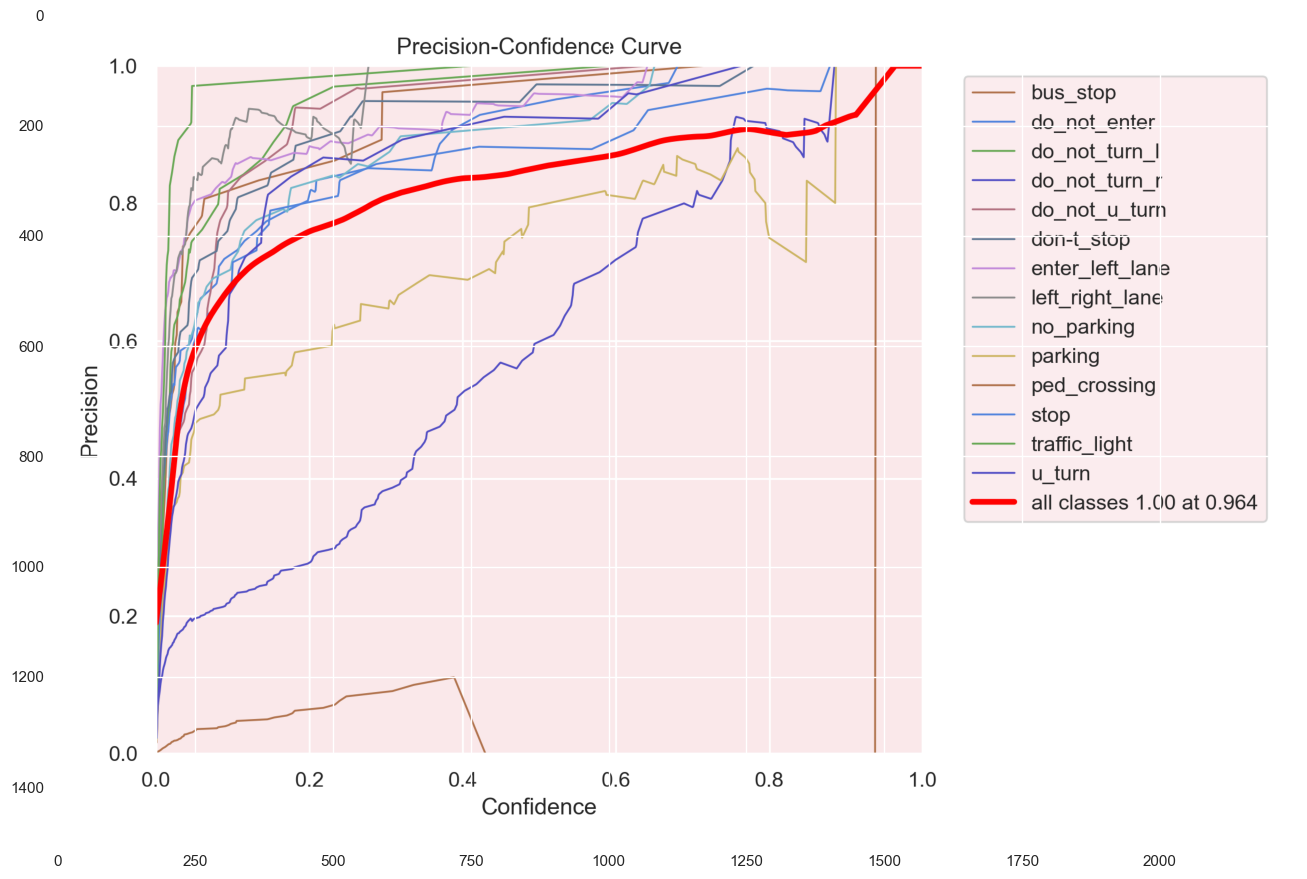

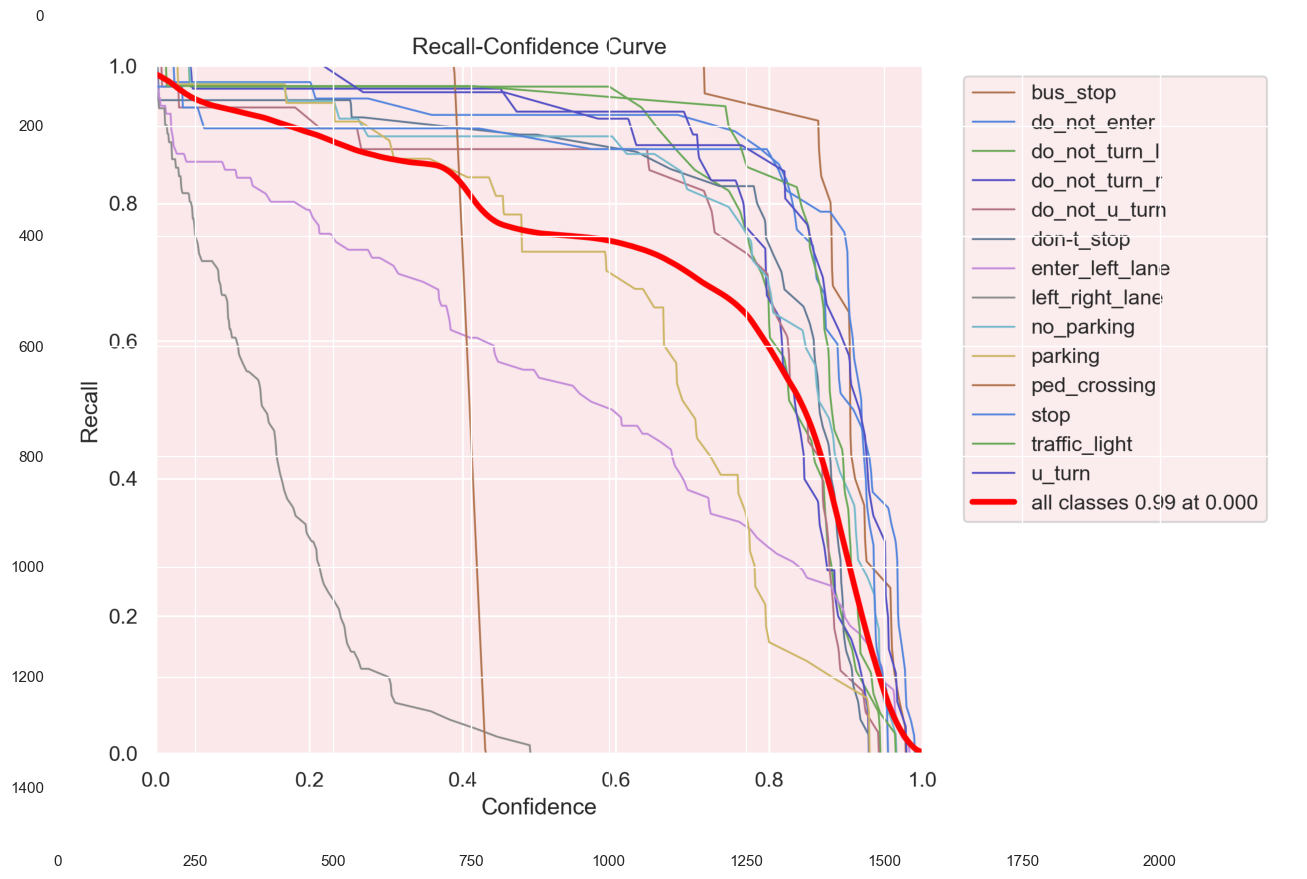

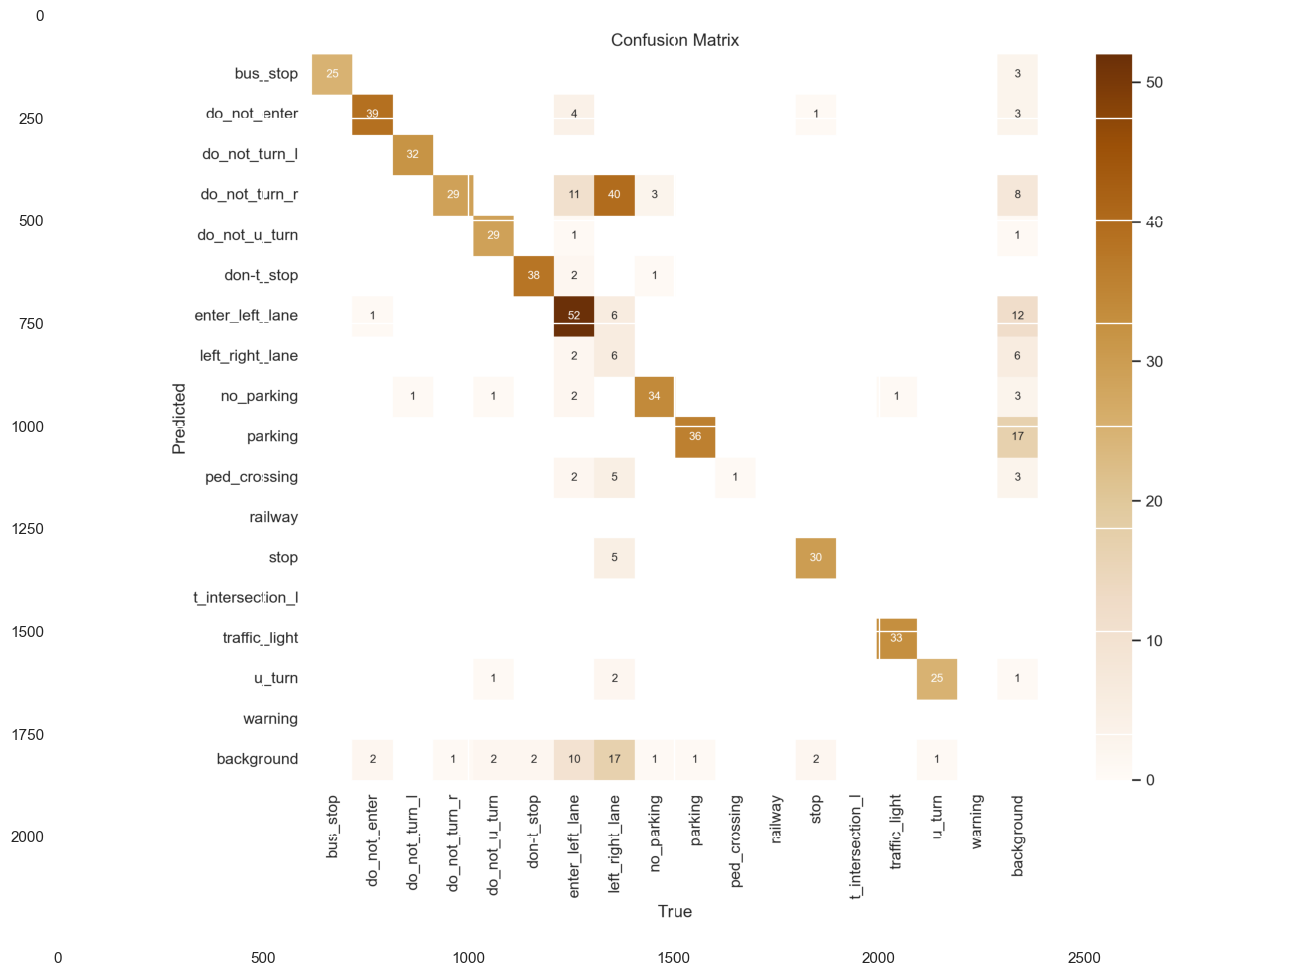

In [13]:
# Load the image
for i in list_of_metrics:
    image = cv2.imread(f'D:\\jesi\\runs\\detect\\train\\{i}')

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image)

    # Show the plot
    plt.show()

In [14]:
Result_Final_model = pd.read_csv('D:\\jesi\\runs\\detect\\train\\results.csv')
Result_Final_model.tail(10)

epoch        train/box_loss        train/cls_loss  \
0                     1                1.4645               4.09010   
1                     2                1.2512               2.96030   
2                     3                1.2629               2.16160   
3                     4                1.2399               1.74950   
4                     5                1.1931               1.44170   
5                     6                1.1551               1.28480   
6                     7                1.1286               1.16820   
7                     8                1.1069               1.04870   
8                     9                1.0548               0.98234   
9                    10                1.0060               0.93117   

         train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0                1.6134               0.03721               0.71659   
1                1.4305               0.04455               0.92932   
2                1.4155               0.61938               0.27965   
3                1.3683               0.78292               0.50826   
4                1.3146               0.77467               0.67681   
5                1.2832               0.75753               0.73736   
6                1.2679               0.81565               0.82462   
7                1.2387               0.85460               0.75753   
8                1.2100               0.82486               0.86393   
9                1.1809               0.82875               0.85641   

       metrics/mAP50(B)   metrics/mAP50-95(B)          val/box_loss  \
0               0.09131               0.06097                1.0930   
1               0.27934               0.17406                1.1344   
2               0.41884               0.25200                1.1842   
3               0.69467               0.42840                1.2090   
4               0.77571               0.48862                1.2892   
5               0.79901               0.50780                1.2783   
6               0.84107               0.53331                1.3046   
7               0.87486               0.55774                1.2878   
8               0.88181               0.55946                1.2639   
9               0.87963               0.57337                1.2635   

           val/cls_loss          val/dfl_loss                lr/pg0  \
0                4.0540                1.2059              0.000124   
1                3.6017                1.2388              0.000227   
2                3.4174                1.3007              0.000305   
3                2.9270                1.3406              0.000335   
4                2.3191                1.4182              0.000287   
5                1.9471                1.4521              0.000240   
6                1.7197                1.4400              0.000193   
7                1.5200                1.4368              0.000146   
8                1.3963                1.4147              0.000099   
9                1.3592                1.4232              0.000052   

                 lr/pg1                lr/pg2  
0              0.000124              0.000124  
1              0.000227              0.000227  
2              0.000305              0.000305  
3              0.000335              0.000335  
4              0.000287              0.000287  
5              0.000240              0.000240  
6              0.000193              0.000193  
7              0.000146              0.000146  
8              0.000099              0.000099  
9              0.000052              0.000052

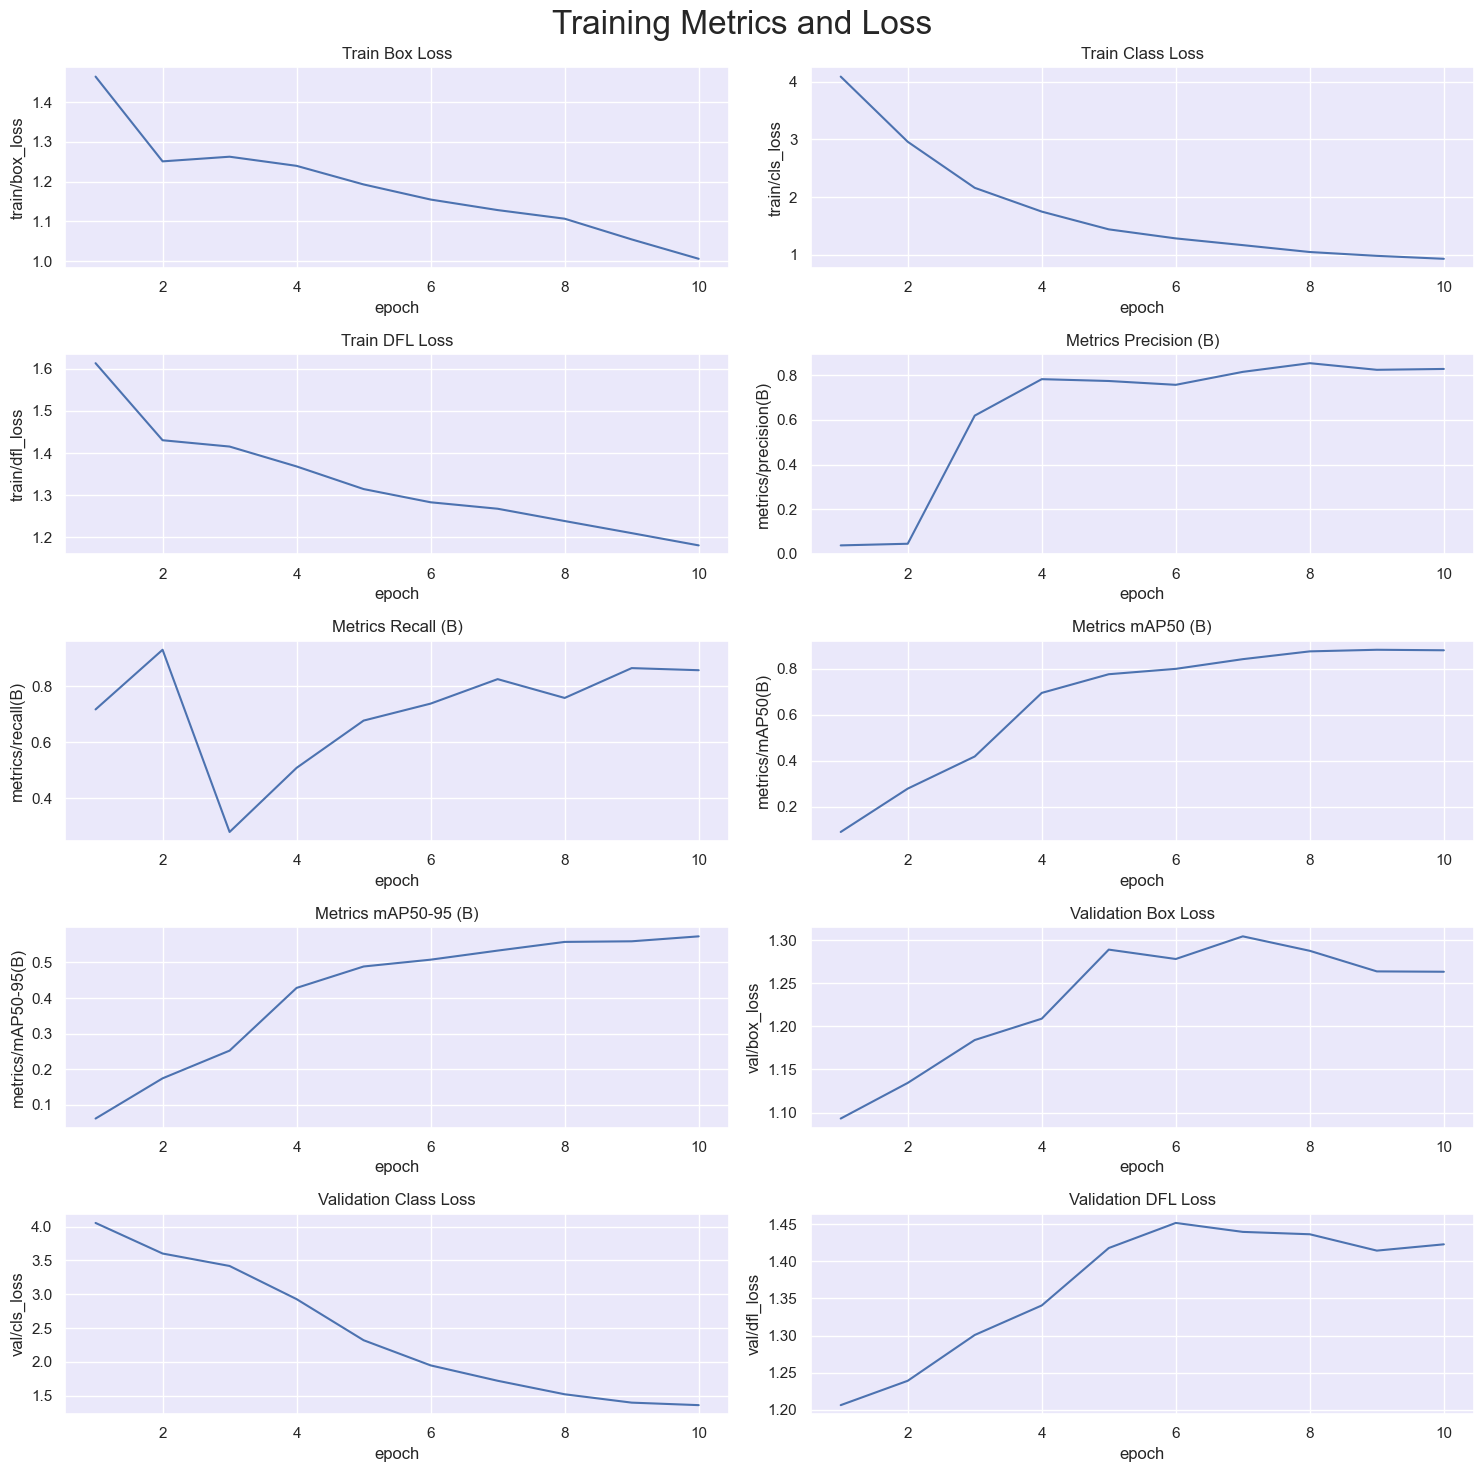

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the results.csv file as a pandas dataframe
df = pd.read_csv('D:\\jesi\\runs\\detect\\train\\results.csv')

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Menghapus spasi dari nama kolom 'epoch'
df.columns = df.columns.str.strip()

# Plot kembali data dengan nama kolom yang diperbarui
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()


In [16]:
# Loading the best performing model
Valid_model = YOLO('D:\\jesi\\runs\\detect\\train\\weights\\best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

Ultralytics YOLOv8.2.24  Python-3.11.9 torch-2.3.0+cpu CPU (AMD Ryzen 3 3200U with Radeon Vega Mobile Gfx)
YOLOv8n summary (fused): 168 layers, 3008963 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\jesi\roadsign\test\labels.cache... 177 images, 0 backgrounds, 0 corrupt: 100%|██████████| 177/177 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [01:10<00:00,  5.87s/it]


                   all        177        178       0.66      0.715      0.752      0.379
              bus_stop        177         30      0.146      0.167     0.0786      0.021
       left_right_lane        177         15          1        0.5       0.94       0.56
               parking        177         27      0.469          1      0.825      0.341
          ped_crossing        177         76      0.856      0.974      0.976       0.51
                u_turn        177         30      0.831      0.933      0.939      0.464
Speed: 4.3ms preprocess, 368.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\val3


In [17]:
# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.6602564427993076
metrics/recall(B):  0.7146649535053002
metrics/mAP50(B):  0.7516269723864346
metrics/mAP50-95(B):  0.37935047139910144


In [18]:
# Path to the directory containing the images
image_dir = 'D:\\jesi\\roadsign\\test\\images'

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Randomly select 10 images from the directory
random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)  # Replace with your preferred method of reading the image
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)
    #results.append(result)


0: 416x416 (no detections), 289.6ms
Speed: 4.0ms preprocess, 289.6ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\detect\train182

0: 416x416 1 ped_crossing, 269.1ms
Speed: 2.2ms preprocess, 269.1ms inference, 6.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\detect\train183

0: 416x416 (no detections), 210.7ms
Speed: 2.0ms preprocess, 210.7ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\detect\train184

0: 416x416 (no detections), 255.1ms
Speed: 2.0ms preprocess, 255.1ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\detect\train185

0: 416x416 1 ped_crossing, 299.9ms
Speed: 1.0ms preprocess, 299.9ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\detect\train186

0: 416x416 (no detections), 215.7ms
Speed: 2.0ms preprocess, 215.7ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Re

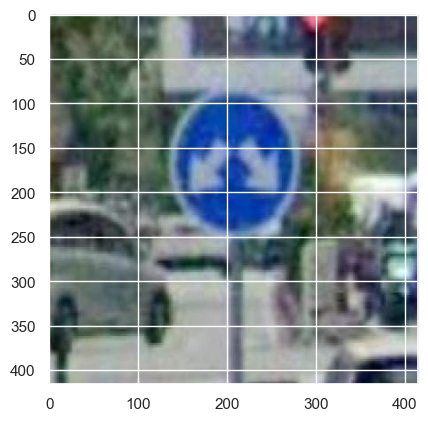

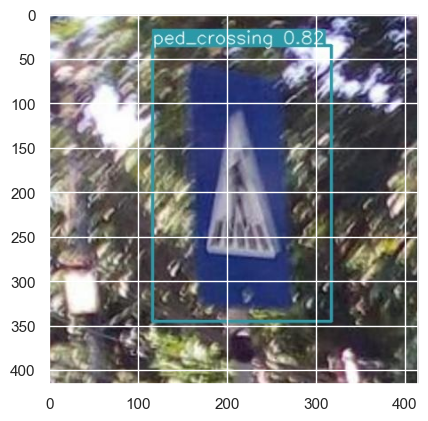

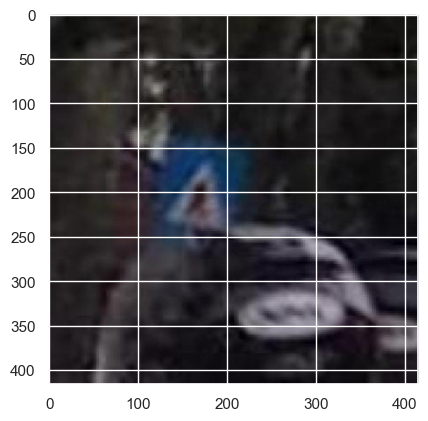

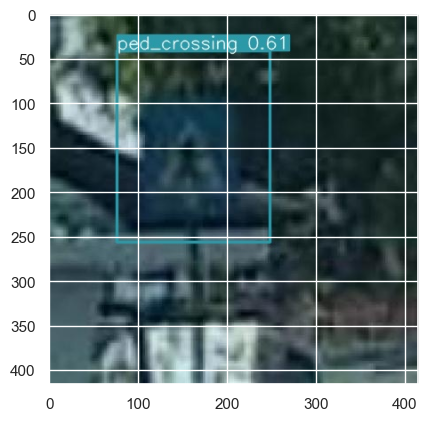

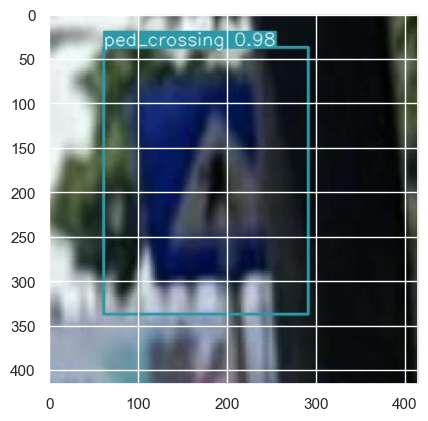

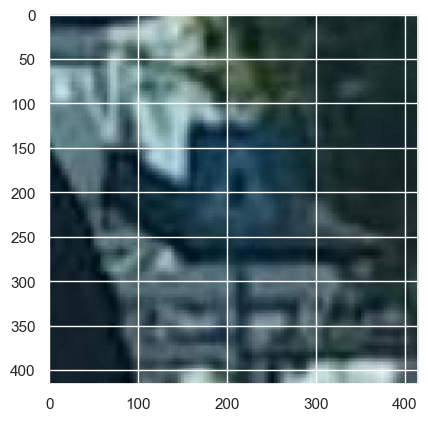

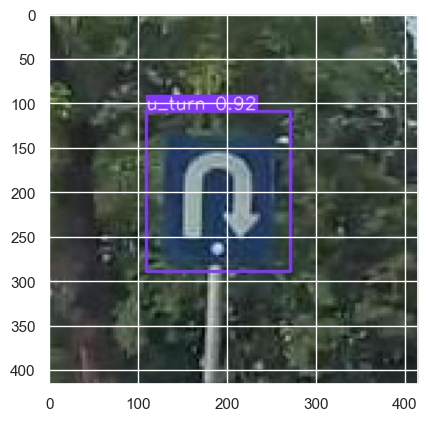

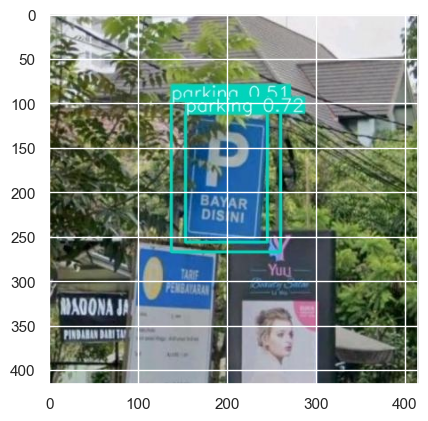

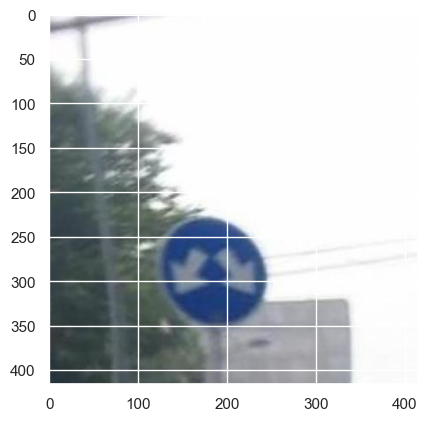

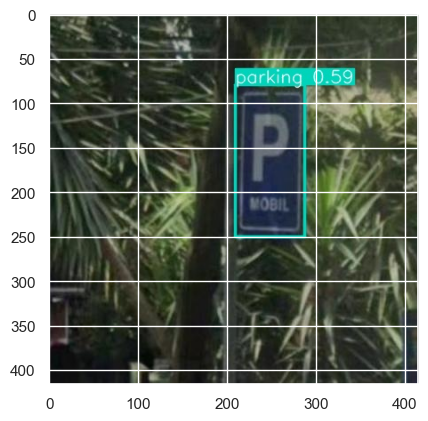

In [19]:
# View results
for i in range(2,12):
    plt.imshow(plt.imread(f'D:\\jesi\\runs\\detect\\train{i}\\image0.jpg'))
    plt.show()